# Tasks for laboratory assignment 3

In [1]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


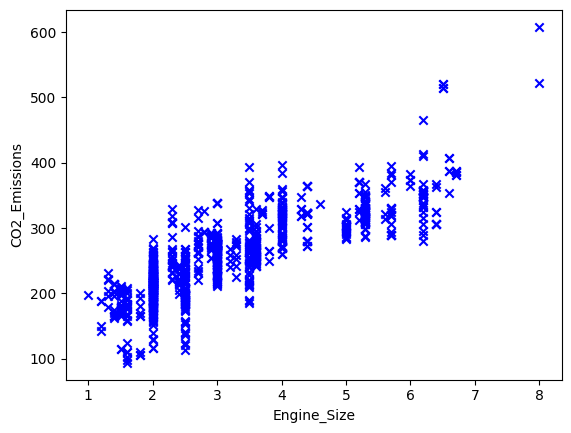

In [14]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [2]:
def extract_texts_from_file(file_path):
    return pd.read_csv(file_path, encoding="cp1251")
 

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

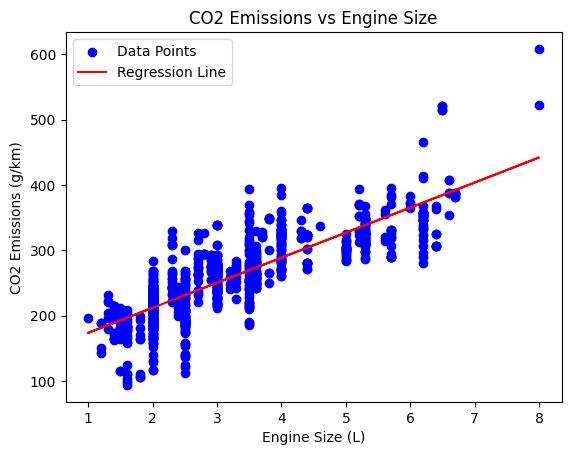

Model Parameters: Intercept = 135.3260546026322, Slope = 38.32301106042744


In [17]:
def CO2_emissions(file_path):
    data = pd.read_csv(file_path, encoding="cp1251")

    X = data[['Engine_Size']].values  
    y = data['CO2_Emissions'].values


    model = LinearRegression()
    model.fit(X, y)

    theta_0 = model.intercept_
    theta_1 = model.coef_[0]

    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel('Engine Size (L)')
    plt.ylabel('CO2 Emissions (g/km)')
    plt.title('CO2 Emissions vs Engine Size')
    plt.legend()
    plt.show()

    return [theta_0, theta_1] 

model_parameters = CO2_emissions('resources/CO2_emission.csv')
print(f'Model Parameters: Intercept = {model_parameters[0]}, Slope = {model_parameters[1]}')


## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

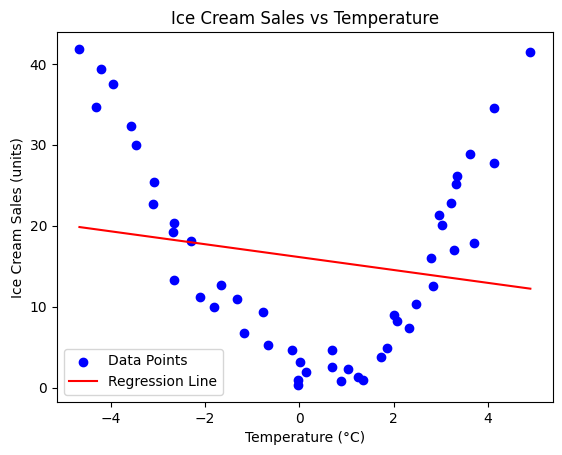

Model Parameters: Intercept = 16.121749391993667, Slope = -0.7964571107159999


In [18]:
def ice_cream_selling(data):
    
    x = data[['Temperature (В°C)']].values
    y = data['Ice Cream Sales (units)'].values

    model = LinearRegression()
    model.fit(x, y)

    intercept = model.intercept_
    slope = model.coef_[0]

    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, model.predict(x), color='red', label='Regression Line')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Ice Cream Sales vs Temperature')
    plt.legend()
    plt.show()

    return [intercept, slope]

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
model_parameters = ice_cream_selling(data)
print(f'Model Parameters: Intercept = {model_parameters[0]}, Slope = {model_parameters[1]}')

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

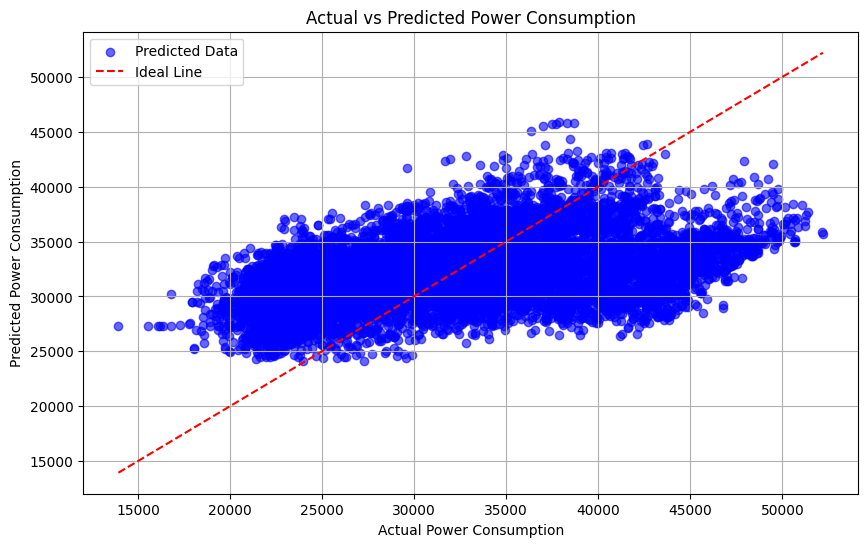

Model Parameters: Intercept = 26479.527652183802, Slopes = [504.11472396615795, -49.18262230746467, -133.1121018188503]


In [7]:
def power_consumption(data):
    x = data[['Temperature', 'Humidity', 'WindSpeed']].values
    y = data['PowerConsumption_Zone1'].values 

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Data')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel('Actual Power Consumption')
    plt.ylabel('Predicted Power Consumption')
    plt.title('Actual vs Predicted Power Consumption')
    plt.legend()
    plt.grid()
    plt.show()

    intercept = model.intercept_  # Intercept
    slopes = model.coef_           # Coefficients for each feature

    return [intercept] + list(slopes)

data = extract_texts_from_file('resources/powerconsumption.csv')
model_parameters = power_consumption(data)
print(f'Model Parameters: Intercept = {model_parameters[0]}, Slopes = {model_parameters[1:]}')

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



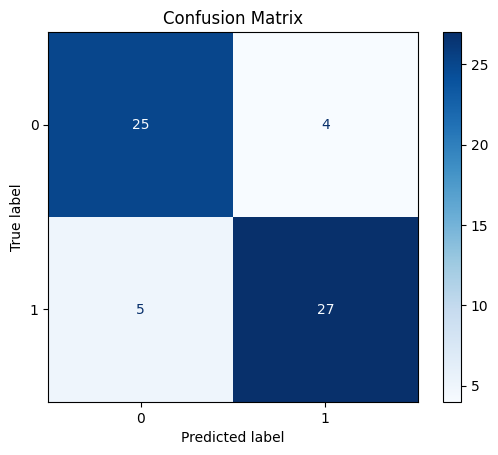

[-0.08578323718641684,
 -0.7688782431451507,
 0.8244065810840908,
 -0.28404018966753525,
 -0.172381982405992,
 0.0963282346202651,
 0.2808840465394174,
 0.40359685613385554,
 -0.5231500285983336,
 -0.7123108945809516,
 0.4428248756997198,
 -0.8134704722919103,
 -0.5810883942406806]

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

def heart_classification(data):
    features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 
                'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
    target = 'output'

    x = data[features]
    y = data[target]
    
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=500)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_val)

    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    return list(model.coef_.flatten())


data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.